In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import matplotlib.ticker as ticker

In [136]:
# Dataset source : https://www.kaggle.com/datasets/michaelbryantds/cpu-and-gpu-product-data?resource=download

data=pd.read_csv("/content/chip_dataset.csv")
data

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,4849,NVIDIA Quadro 3000M,GPU,2011-02-22,40.0,75.0,332.0,1950.0,450.0,TSMC,NVIDIA,NaN,432.0,36.0
4850,4850,Intel GMA 950,GPU,2005-06-01,90.0,7.0,NaN,NaN,250.0,Intel,Intel,NaN,NaN,NaN
4851,4851,NVIDIA GeForce GT 320M,GPU,2010-03-03,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA,NaN,52.8,NaN
4852,4852,NVIDIA GeForce FX 5200,GPU,2003-03-06,150.0,NaN,65.0,29.0,250.0,TSMC,NVIDIA,NaN,NaN,NaN


In [137]:
data["Release Date"] = pd.to_datetime(data["Release Date"])
data=data[data["Type"] == "CPU"].reset_index(drop=True) # Only CPU
data = data.dropna(subset=['Release Date']) # Remove CPU without Release date
data = data.dropna(subset=['Transistors (million)']) # Remove CPU without transistor count
data.sort_values(by='Release Date', inplace=True) # Sort the data by Release date
date = data['Release Date']
transistor = data['Transistors (million)']
print(date)
print(transistor)

434    2000-06-05
2008   2000-06-05
1388   2000-06-05
621    2000-06-05
376    2000-06-05
          ...    
1377   2021-01-12
64     2021-01-12
90     2021-01-12
1701   2021-01-12
2146   2021-01-12
Name: Release Date, Length: 1675, dtype: datetime64[ns]
434       37.0
2008      37.0
1388      37.0
621       37.0
376       37.0
         ...  
1377    9800.0
64      9800.0
90      9800.0
1701    9800.0
2146    9800.0
Name: Transistors (million), Length: 1675, dtype: float64


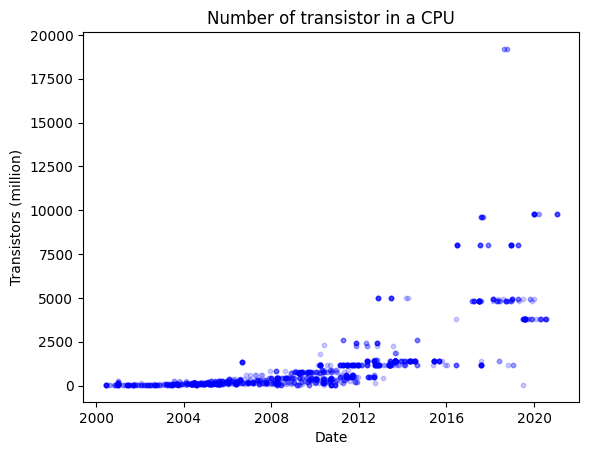

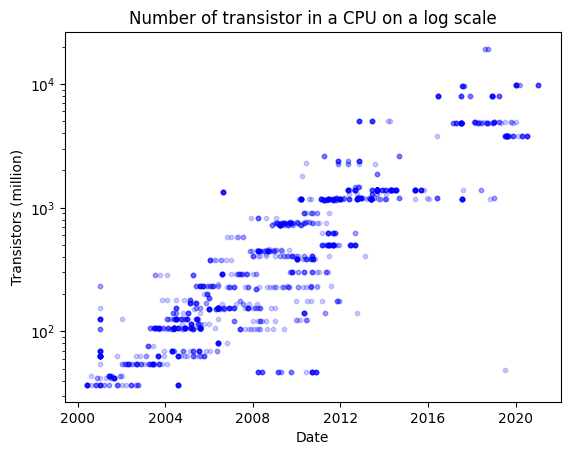

In [138]:
plt.xlabel("Date")
plt.ylabel("Transistors (million)")
plt.title("Number of transistor in a CPU")
plt.scatter(date, transistor,s=10,alpha=0.2,c='b')
plt.show()

plt.xlabel("Date")
plt.ylabel("Transistors (million)")
plt.title("Number of transistor in a CPU on a log scale")
plt.yscale('log')
plt.scatter(date, transistor,s=10,alpha=0.2,c='b')
plt.show()

In [139]:
oneYear = 365*24*60*60*1000000000 # One year in nanoseconds
x = (pd.to_datetime(date).astype(np.int64) / (oneYear * 2)).astype(np.float64)
y = transistor
res = linregress(x,np.log(y))
slope = res.slope
intercept = res.intercept
print("Slope:", slope)
print("Real slope:", np.exp(slope))
mooreLawSlope = 2
logMooreLawSlope = np.log(mooreLawSlope)
print("Moore law slope:", mooreLawSlope)
print("Moore law slope on a log scale:", logMooreLawSlope)

Slope: 0.5327481465996401
Real slope: 1.7036076449778932
Moore law slope: 2
Moore law slope on a log scale: 0.6931471805599453


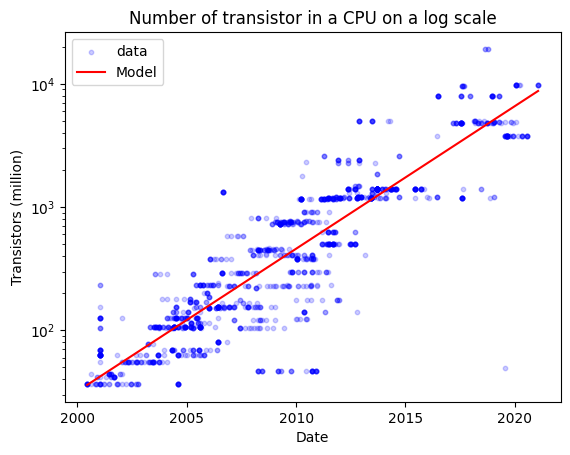

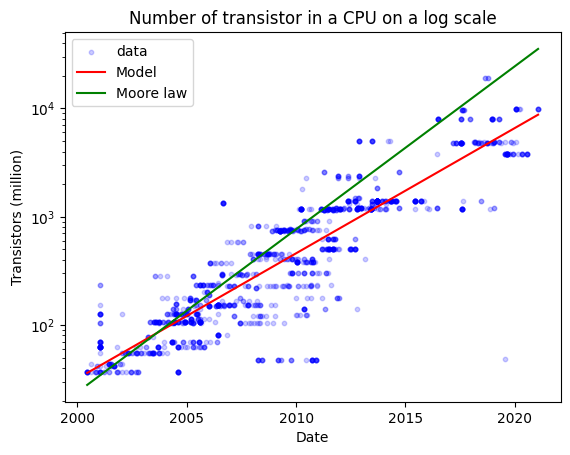

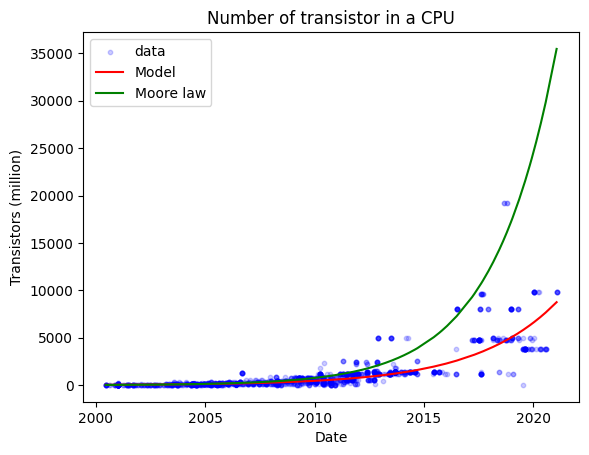

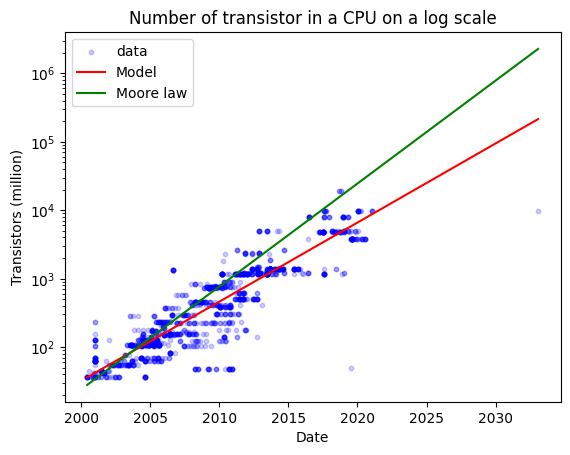

Number of transistor in 10 years predicted by moore law: 2269 billions
Number of transistor in 10 years predicted by our model: 213 billions


In [140]:
model=lambda x: np.exp(x * slope + intercept)
mooreLaw=lambda x: np.exp(x * logMooreLawSlope - np.log(np.min(y)) * 2)


# Add 1970 and multiplie by 2 because the model start at 0 in year 1970 and one unit is equivalent to 2 years
plt.scatter(x * 2 + 1970,y,label='data',s=10,alpha=0.2,c='b')
plt.plot(x * 2 + 1970,model(x),label='Model',c='r')
plt.yscale('log')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Transistors (million)")
plt.title("Number of transistor in a CPU on a log scale")
plt.show()

plt.scatter(x * 2 + 1970,y,label='data',s=10,alpha=0.2,c='b')
plt.plot(x * 2 + 1970,model(x),label='Model',c='r')
plt.plot(x * 2 + 1970,mooreLaw(x),label='Moore law',c='g')
plt.yscale('log')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Transistors (million)")
plt.title("Number of transistor in a CPU on a log scale")
plt.show()

plt.scatter(x * 2 + 1970,y,label='data',s=10,alpha=0.2,c='b')
plt.plot(x * 2 + 1970,model(x),label='Model',c='r')
plt.plot(x * 2 + 1970,mooreLaw(x),label='Moore law',c='g')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Transistors (million)")
plt.title("Number of transistor in a CPU")
plt.show()

x.iloc[-1] = np.max(x) + 6 # Add 12 years because our data set ends in 2021

plt.scatter(x * 2 + 1970,y,label='data',s=10,alpha=0.2,c='b')
plt.plot(x * 2 + 1970,model(x),label='Model',c='r')
plt.plot(x * 2 + 1970,mooreLaw(x),label='Moore law',c='g')
plt.legend()
plt.yscale('log')
plt.xlabel("Date")
plt.ylabel("Transistors (million)")
plt.title("Number of transistor in a CPU on a log scale")
plt.show()


print("Number of transistor in 10 years predicted by moore law:", (mooreLaw(x.iloc[-1]) / 1000).astype(np.int64), "billions")
print("Number of transistor in 10 years predicted by our model:", (model(x.iloc[-1]) / 1000).astype(np.int64), "billions")